In [547]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

In [548]:
!pip install tabulate

In [549]:
!pip install plotly

In [550]:
BOARD_ROWS = 5
BOARD_COLS = 5

In [551]:
def show_board(b_rows,b_columns,fin,dan,st):
    df=[]
    for i in range(b_rows):
        df2=[]
        for j in range(b_columns):
            df2.append("Free")
        df.append(df2)
#     print(df)
    for i in dan:
#         print(type(i[0]))
        x=i[0]
        y=i[1]

        df[x][y]="DANGER"
        
    df[fin[0]][fin[1]]="GOAL"
    df[st[0]][st[1]]="START"
    df=pd.DataFrame(df)
    print(tabulate(df,tablefmt = 'psql'))
            
    

In [552]:
START = (0, 0)
WIN_STATE = (4, 3)
HOLE_STATE = [(1,0),(3,3),(4,2),(1,3)]

In [553]:
show_board(BOARD_ROWS,BOARD_COLS,WIN_STATE,HOLE_STATE,START)

+---+--------+------+--------+--------+------+
| 0 | START  | Free | Free   | Free   | Free |
| 1 | DANGER | Free | Free   | DANGER | Free |
| 2 | Free   | Free | Free   | Free   | Free |
| 3 | Free   | Free | Free   | DANGER | Free |
| 4 | Free   | Free | DANGER | GOAL   | Free |
+---+--------+------+--------+--------+------+


In [554]:
class State:
    def __init__(self, state=START):
        
        self.state = state
        self.isEnd = False        

    def getReward(self):
        
        for i in HOLE_STATE:
            if self.state == i:
                return -7
        if self.state == WIN_STATE:
            return 1       
        
        else:
            return -1

    def isEndFunc(self):
        
        if (self.state == WIN_STATE):
            self.isEnd = True
            
        for i in HOLE_STATE:
            if self.state == i:
                self.isEnd = True

    def nxtPosition(self, action):     
        
        if action == 0:                
            nxtState = (self.state[0] - 1, self.state[1]) #up             
        elif action == 1:
            nxtState = (self.state[0] + 1, self.state[1]) #down
        elif action == 2:
            nxtState = (self.state[0], self.state[1] - 1) #left
        else:
            nxtState = (self.state[0], self.state[1] + 1) #right


        
        if (nxtState[0] >= 0) and (nxtState[0] <= 4):
            if (nxtState[1] >= 0) and (nxtState[1] <= 4):    
                                  
                    return nxtState 
             
        return self.state 

In [555]:
random.random()

0.670489051484575

In [556]:
import plotly.express as px

In [558]:
class Agent:

    def __init__(self):
        
        self.states = []
        self.actions = [0,1,2,3]    
        self.State = State()
        
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.1
        self.isEnd = self.State.isEnd
        self.steps=0

        
        self.plot_reward = []
        
        self.data=[]
        
        self.Q = {}
        self.new_Q = {}
        
        self.rewards = 0
        
        
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                for k in range(len(self.actions)):
                    self.Q[(i, j, k)] =0
                    self.new_Q[(i, j, k)] = 0
        
#         print(self.Q)
#         print(self.Q.keys())
        print(len(self.Q))
        
    

 
    def Action(self):

        rnd = random.random()
 
        mx_nxt_reward =-10
        action = None
#         print(self.State.state,"-------------------------------")

        if(rnd >self.epsilon) :

            for k in self.actions:
                
                i,j = self.State.state
                
                nxt_reward = self.Q[(i,j, k)]
#                 print(i,j,k,nxt_reward,"=============================")
                
                if nxt_reward >= mx_nxt_reward:
                    action = k
                    mx_nxt_reward = nxt_reward
                    

        else:
            action = np.random.choice(self.actions)

        position = self.State.nxtPosition(action)
        return position,action
    

    def Q_Learning(self,episodes):
        x = 0
    
        while(x < episodes):
        
            if self.isEnd:
            
                reward = self.State.getReward()
                self.rewards += reward
                self.plot_reward.append(self.rewards)
                
          
                i,j = self.State.state
            
                for a in self.actions:
                    self.new_Q[(i,j,a)] = round(reward,3)
                    
                
                flag=[]
                    
                if (self.State.state == WIN_STATE):
                    flag.append("WIN")
                else:
                    flag.append("LOST")
                
                flag.append(self.rewards)
                self.data.append(flag)
                    
               
                self.State = State()
                self.isEnd = self.State.isEnd
                
                
                self.rewards = 0
                x+=1
            else:
                self.steps+=1
                
                mx_nxt_value = -10
                
                next_state, action = self.Action()
            
                i,j = self.State.state
                reward = self.State.getReward()
                
                self.rewards +=reward
                
                
                for a in self.actions:
                    nxtStateAction = (next_state[0], next_state[1], a)
                    q_value = (1-self.alpha)*self.Q[(i,j,action)] + self.alpha*(reward + self.gamma*self.Q[nxtStateAction])
                    
#                     print(a,self.State.state,mx_nxt_value,q_value)

                    
                    if q_value >= mx_nxt_value:
                        mx_nxt_value = q_value
                
                
                self.State = State(state=next_state)
                self.State.isEndFunc()
                self.isEnd = self.State.isEnd
                
                
                self.new_Q[(i,j,action)] = round(mx_nxt_value,3)
            
            
            self.Q = self.new_Q.copy()

        #print final Q table output
#         print(self.Q)
        
    
    def plot(self,episodes):
        
        
#         plt.plot(self.plot_reward)
#         print(len(self.plot_reward))
#         plt.show()
#        print(type(self.plot_reward))
        
        df = pd.DataFrame(self.plot_reward)
        fig = px.line(df)
        fig.show()
        
        df=pd.DataFrame(self.data,columns=["result","reward"])
        print(df.shape,df)
        fig = px.line(df,y="reward", line_dash='result',color='result')
        fig.show()
        
        
    def showValues(self):
        df1=[]
        for i in range(BOARD_ROWS):
            df2=[]
            for j in range(BOARD_COLS):
                mx_nxt_val = -10
                for a in self.actions:
                    nxt_value=self.Q[(i,j,a)]
#                     print(i,j,a,nxt_value)
                    if nxt_value>=mx_nxt_val:
                        mx_nxt_val=nxt_value
                df2.append(mx_nxt_val)
            df1.append(df2)
        df=pd.DataFrame(df1)
        print(tabulate(df,tablefmt = 'psql'))

In [559]:
show_board(BOARD_ROWS,BOARD_COLS,WIN_STATE,HOLE_STATE,START)

+---+--------+------+--------+--------+------+
| 0 | START  | Free | Free   | Free   | Free |
| 1 | DANGER | Free | Free   | DANGER | Free |
| 2 | Free   | Free | Free   | Free   | Free |
| 3 | Free   | Free | Free   | DANGER | Free |
| 4 | Free   | Free | DANGER | GOAL   | Free |
+---+--------+------+--------+--------+------+


In [560]:
ag = Agent()
episodes = 500
ag.Q_Learning(episodes)
ag.plot(episodes)
ag.showValues()

100


(500, 2)     result  reward
0     LOST     -18
1     LOST     -11
2     LOST      -9
3     LOST     -13
4     LOST     -22
..     ...     ...
495    WIN      -8
496   LOST     -19
497    WIN      -8
498    WIN      -8
499    WIN      -8

[500 rows x 2 columns]


+---+--------+--------+--------+--------+--------+
| 0 | -5.737 | -5.264 | -4.738 | -4.154 | -3.505 |
| 1 | -7     | -4.739 | -4.155 | -7     | -2.784 |
| 2 | -4.294 | -4.155 | -3.506 | -2.784 | -1.982 |
| 3 | -4.241 | -4.237 | -4.082 | -7     | -1.091 |
| 4 | -4.033 | -4.279 | -7     |  1     | -0.1   |
+---+--------+--------+--------+--------+--------+


In [520]:
ag = Agent()
episodes = 6
ag.Q_Learning(episodes)
ag.plot(episodes)
ag.showValues()

100


(6, 2)   result  reward
0   LOST     -14
1   LOST     -11
2   LOST     -10
3   LOST     -12
4   LOST     -13
5   LOST     -10


0 0 0 -0.975
0 0 1 -5.6
0 0 2 -0.975
0 0 3 -1.194
0 1 0 -0.5
0 1 1 -0.75
0 1 2 -1.172
0 1 3 -0.75
0 2 0 0
0 2 1 0
0 2 2 -0.725
0 2 3 -0.5
0 3 0 0
0 3 1 -0.5
0 3 2 0
0 3 3 -0.5
0 4 0 0
0 4 1 0
0 4 2 -0.5
0 4 3 -0.5
1 0 0 -7
1 0 1 -7
1 0 2 -7
1 0 3 -7
1 1 0 0
1 1 1 0
1 1 2 -3.65
1 1 3 -0.5
1 2 0 0
1 2 1 0
1 2 2 0
1 2 3 -3.65
1 3 0 -7
1 3 1 -7
1 3 2 -7
1 3 3 -7
1 4 0 0
1 4 1 0
1 4 2 0
1 4 3 0
2 0 0 0
2 0 1 0
2 0 2 0
2 0 3 0
2 1 0 0
2 1 1 0
2 1 2 0
2 1 3 0
2 2 0 0
2 2 1 0
2 2 2 0
2 2 3 0
2 3 0 0
2 3 1 0
2 3 2 0
2 3 3 0
2 4 0 0
2 4 1 0
2 4 2 0
2 4 3 0
3 0 0 0
3 0 1 0
3 0 2 0
3 0 3 0
3 1 0 0
3 1 1 0
3 1 2 0
3 1 3 0
3 2 0 0
3 2 1 0
3 2 2 0
3 2 3 0
3 3 0 0
3 3 1 0
3 3 2 0
3 3 3 0
3 4 0 0
3 4 1 0
3 4 2 0
3 4 3 0
4 0 0 0
4 0 1 0
4 0 2 0
4 0 3 0
4 1 0 0
4 1 1 0
4 1 2 0
4 1 3 0
4 2 0 0
4 2 1 0
4 2 2 0
4 2 3 0
4 3 0 0
4 3 1 0
4 3 2 0
4 3 3 0
4 4 0 0
4 4 1 0
4 4 2 0
4 4 3 0
+---+--------+------+---+----+---+
| 0 | -0.975 | -0.5 | 0 |  0 | 0 |
| 1 | -7     |  0   | 0 | -7 | 0 |
| 2 |  0     |  0   | 

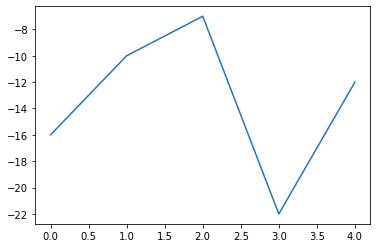

-----------------------------------------------
| -1.306 | -0.5   | 0      | 0      | 0      | 
-----------------------------------------------
| -5     | 0      | 0      | -5     | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 0      | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 0      | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 1      | 0      | 
-----------------------------------------------


In [277]:
ag.plot(episodes)
ag.showValues()

In [278]:
ag.showValues()

-----------------------------------------------
| -1.306 | -0.5   | 0      | 0      | 0      | 
-----------------------------------------------
| -5     | 0      | 0      | -5     | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 0      | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 0      | 0      | 
-----------------------------------------------
| 0      | 0      | 0      | 1      | 0      | 
-----------------------------------------------


In [524]:
show_field(Field_ROWS,Field_COLS,GOAL,ENEMY_STATE,START)

+---+--------+------+--------+--------+------+
| 0 | START  | Free | Free   | Free   | Free |
| 1 | DANGER | Free | Free   | DANGER | Free |
| 2 | Free   | Free | Free   | Free   | Free |
| 3 | Free   | Free | Free   | DANGER | Free |
| 4 | Free   | Free | DANGER | GOAL   | Free |
+---+--------+------+--------+--------+------+


In [523]:
Field_ROWS = 5
Field_COLS = 5

In [ ]:
START = (0, 0)
GOAL = (4, 3)
ENEMY_STATE = [(1,0),(3,3),(4,2),(1,3)]